## Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions
Note -

Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD Insights to be drawn -

Get all the cars and their types that do not qualify for clean alternative fuel vehicle

Get all TESLA cars with the model year, and model type made in Bothell City.

Get all the cars that have an electric range of more than 100, and were made after 2015

Draw plots to show the distribution between city and electric vehicle type

In [1]:
#importing necessary library and tools
import warnings
import numpy as np
import pandas as pd
import json
import requests
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('Electric_Vehicle_Population_Data .csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [6]:
#respective counts
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [7]:
#replacing with smaller value name for easy handling
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace(
    to_replace='Clean Alternative Fuel Vehicle Eligible',value='Eligible')
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace(
    to_replace='Eligibility unknown as battery range has not been researched',value='Unknown')
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace(
    to_replace='Not eligible due to low battery range',value='Not Eligible')

In [8]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligible        60551
Unknown         53446
Not Eligible    16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [9]:
data['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

In [12]:
data['Electric Vehicle Type']=data['Electric Vehicle Type'].replace(to_replace='Battery Electric Vehicle (BEV)',value='BEV')
data['Electric Vehicle Type']=data['Electric Vehicle Type'].replace(to_replace='Plug-in Hybrid Electric Vehicle (PHEV)',value='PHEV')

In [13]:
data['Electric Vehicle Type'].value_counts()

BEV     100156
PHEV     30287
Name: Electric Vehicle Type, dtype: int64

In [14]:
#not eligible data
data_nteligible=data.loc[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Eligible']
#data_nteligible.head()
not_eligible=data_nteligible.iloc[:,6:8]
not_eligible.shape

(69892, 2)

In [15]:
make=not_eligible['Make'].values
model=not_eligible['Model'].values
print(f'Maker of car do not qualify for clean alternative fuel vehicle are:{make}')
print(f'Model of car do not qualify for clean alternative fuel vehicle are:{model}')

Maker of car do not qualify for clean alternative fuel vehicle are:['FORD' 'AUDI' 'FORD' ... 'NISSAN' 'TESLA' 'TESLA']
Model of car do not qualify for clean alternative fuel vehicle are:['FUSION' 'Q5 E' 'C-MAX' ... 'LEAF' 'MODEL Y' 'MODEL 3']


In [16]:
data.loc[data['City']=='Bothell City']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


## No cars are made in 'Bothell City' , neither Tesla

In [17]:
data_range=data.loc[data['Electric Range']>100]
data_year=data_range.loc[data['Model Year']>2015]
data_car=data_year.iloc[:,5:8]
model=data_car['Model'].values
make=data_car['Make'].values
print(f'cars models that have an electric range of more than 100, and were made after 2015 is/are: {model}')
print(f'cars makers that have an electric range of more than 100, and were made after 2015 is/are: {make}')

cars models that have an electric range of more than 100, and were made after 2015 is/are: ['MODEL X' 'MODEL 3' 'MODEL S' ... 'MODEL Y' 'MODEL 3' 'MODEL X']
cars makers that have an electric range of more than 100, and were made after 2015 is/are: ['TESLA' 'TESLA' 'TESLA' ... 'TESLA' 'TESLA' 'TESLA']


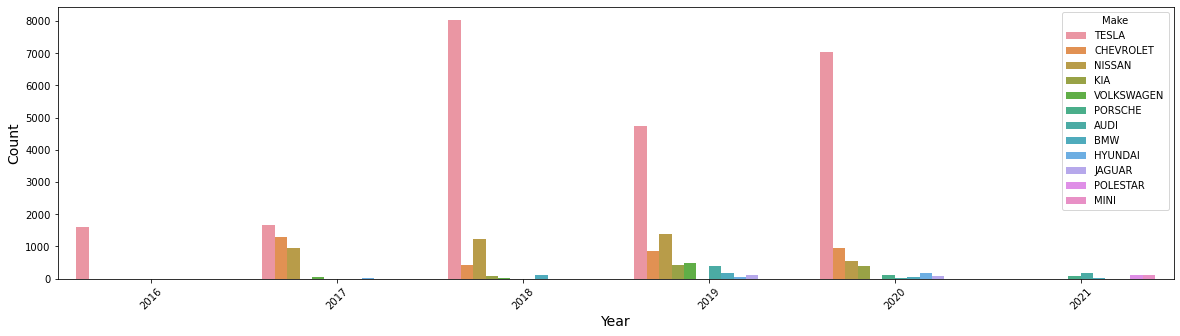

In [18]:
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=data_car, x= 'Model Year', hue='Make')
plt.xlabel("Year", size=14) 
plt.ylabel("Count", size=14)
plt.xticks(rotation=45)
plt.show()

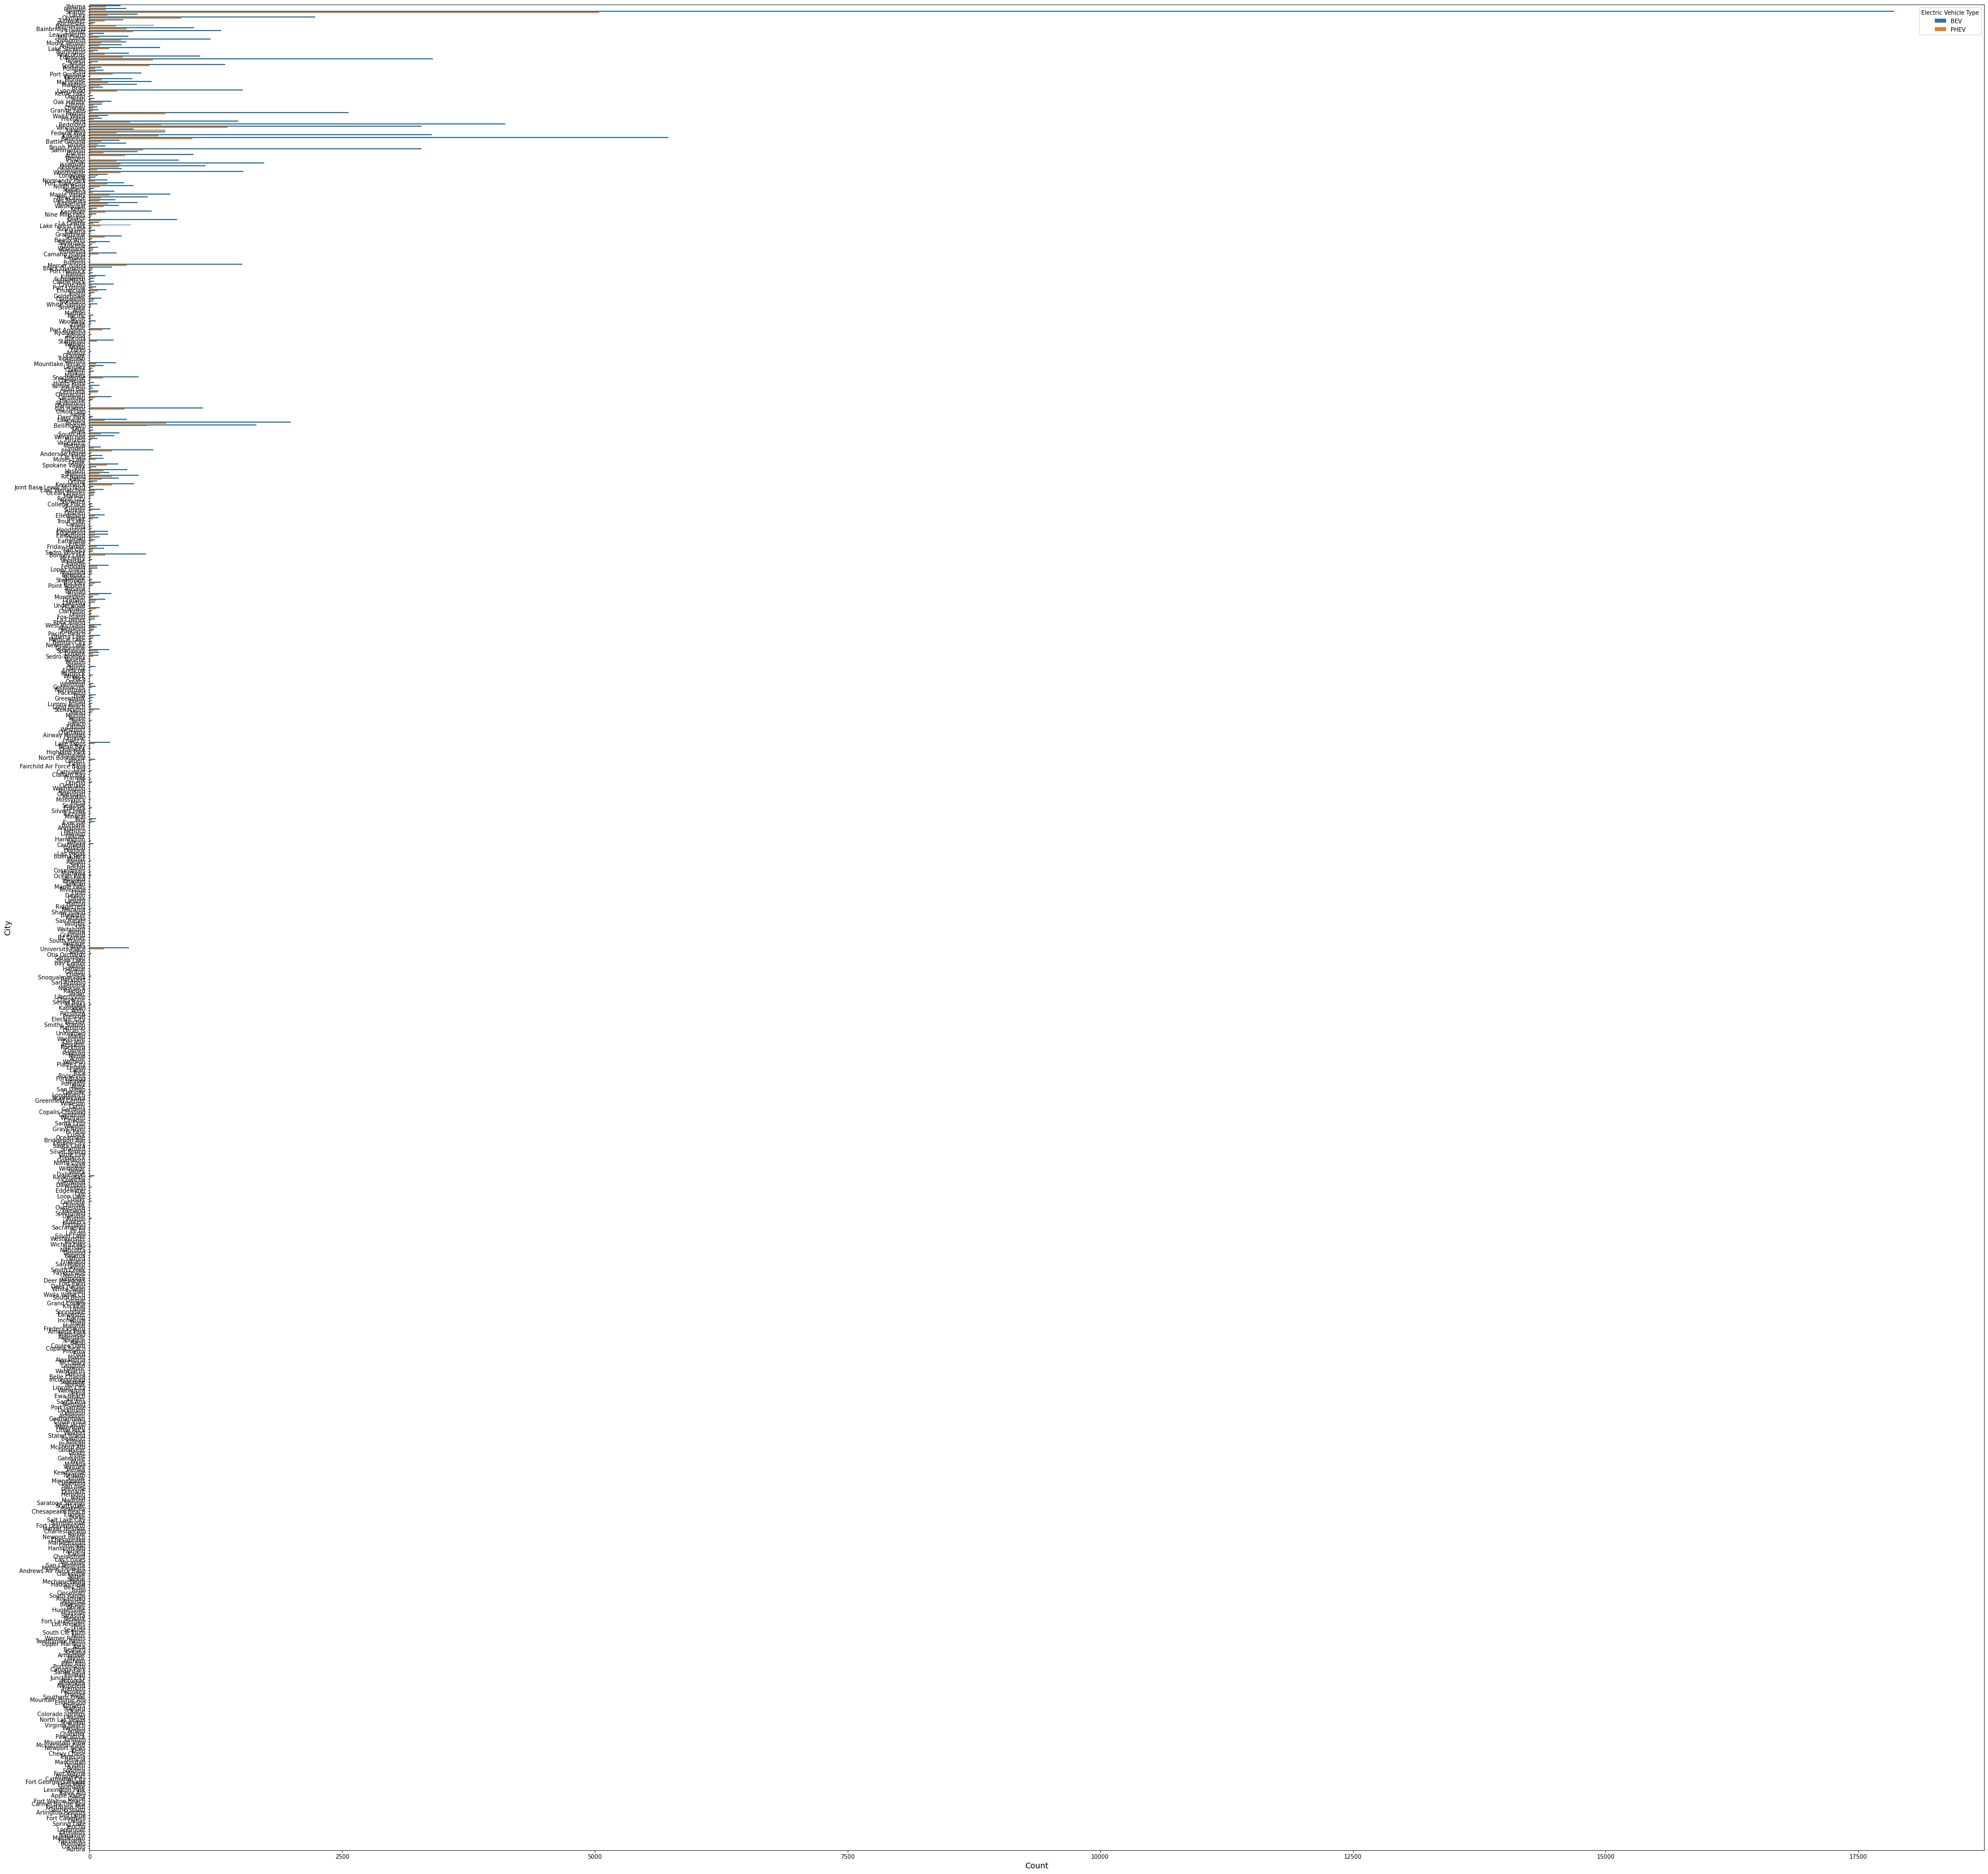

In [19]:
axs,fig=plt.subplots(1,1,figsize=(60,60))
plt.subplot(111)
sns.countplot(data=data, y= 'City', hue='Electric Vehicle Type')
plt.xlabel("Count", size=14) 
plt.ylabel("City", size=14)
plt.yticks(rotation=0)
plt.show()

## Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase orparagraph, and return their respective count as a dictionary.
Note -
Write code comments wherever required for code 

You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [22]:
import nltk
from nltk import pos_tag as nltk_pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [20]:
import nltk
from nltk import pos_tag as nltk_pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [21]:
def count_tags(text):
    words = word_tokenize(text)
    
    tagged_words = pos_tag(words)
    
    # Initialize for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over the tagged words and count the occurrences of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('V'):  # Verb
            verb_count += 1
        elif tag.startswith('N'):  # Noun
            noun_count += 1
        elif tag == 'PRP':  # Pronoun
            pronoun_count += 1
        elif tag.startswith('J'):  # Adjective
            adjective_count += 1
    
    # Create a dictionary with the counts
    counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return counts

# Example usage
text = "The quick brown fox jumps over the lazy dog. It is a sunny day."
result = count_tags(text)
print(result)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Arti/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Arti\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
def count_tags(text):
    words = word_tokenize(text)
    
    tagged_words = pos_tag(words)
    
    # Initialize for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over the tagged words and count the occurrences of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('V'):  # Verb
            verb_count += 1
        elif tag.startswith('N'):  # Noun
            noun_count += 1
        elif tag == 'PRP':  # Pronoun
            pronoun_count += 1
        elif tag.startswith('J'):  # Adjective
            adjective_count += 1
    
    # Create a dictionary with the counts
    counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return counts

# Example usage
text = "The quick brown fox jumps over the lazy dog. It is a sunny day."
result = count_tags(text)
print(result)